In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/weblog-analysis

/content/drive/.shortcut-targets-by-id/1DiYv_226TIXm-onQz5PrQRPkW0E2eX9R/weblog-analysis


In [4]:
import pandas as objpandas
import gc
import matplotlib.pyplot as objplt

In [5]:
#Load the train data-set
train_dataset = objpandas.read_csv('/content/drive/MyDrive/weblog-analysis/Train.csv', encoding='unicode_escape', low_memory=False) 
#Print the count of rows and coulmns in csv file
print("Dimensions of Dataset: {}".format(train_dataset.shape))

Dimensions of Dataset: (5266, 16)


In [6]:
# Dropped all the Null, Empty, NA values from csv file 
train_new_dataset = train_dataset.dropna(axis=0, how='any') 

print("Dimensions of Dataset after Pre-processing : {}".format(train_new_dataset.shape))

print("Variable Type: \n", train_new_dataset.dtypes) 

Dimensions of Dataset after Pre-processing : (5266, 16)
Variable Type: 
 Unnamed: 0            int64
Date & Time          object
User IP              object
Method               object
Url                  object
Query String         object
Agent IP             object
Browser Type         object
OS                    int64
Url_Category          int64
Agent_IP_Category     int64
Login Type            int64
HTTP Status           int64
Test1                 int64
Win 32 Status         int64
Sub Status            int64
dtype: object


In [7]:
#Load the test data-set
test_dataset = objpandas.read_csv('/content/drive/MyDrive/weblog-analysis/Test.csv', encoding='unicode_escape', low_memory=False)

#Print the count of rows and coulmns in csv file
print("Dimensions of Dataset: {}".format(test_dataset.shape))

Dimensions of Dataset: (4, 15)


In [8]:
# Dropped all the Null, Empty, NA values from csv file 
test_new_dataset = test_dataset.dropna(axis=0, how='any') 

X = train_new_dataset.iloc[:,9:11]
# x = train_new_dataset['Agent_IP_Category']

print(X.head)

print("Dimensions of X : {}".format(X.shape))

<bound method NDFrame.head of       Url_Category  Agent_IP_Category
0               26                167
1               26                604
2               26                 55
3               20                874
4               31                984
...            ...                ...
5261            21                282
5262            23                282
5263            26                282
5264            20                247
5265            29                916

[5266 rows x 2 columns]>
Dimensions of X : (5266, 2)


In [9]:
Y = train_new_dataset['Url_Category']

# Value to predict
to_pedict = test_new_dataset.iloc[:,9:11]

collected = gc.collect()

print("Garbage collector: ", collected);

Garbage collector:  52


In [10]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
processed_12_dataset = objpandas.read_csv('/content/drive/MyDrive/weblog-analysis/Processed_12.csv', encoding='unicode_escape', low_memory=False) 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.35, random_state = 0)



In [11]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 6,
            'alpha': 10,
            'learning_rate': 0.6,
            'n_estimators':1000
        }
            
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X_train, Y_train)

XGBClassifier(alpha=10, learning_rate=0.6, max_depth=6, n_estimators=1000,
              objective='multi:softprob')

In [12]:
print(xgb_clf)

XGBClassifier(alpha=10, learning_rate=0.6, max_depth=6, n_estimators=1000,
              objective='multi:softprob')


In [13]:
Y_pred = xgb_clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

XGBoost model accuracy score: 0.9935


In [15]:
googlebot = objpandas.read_csv('/content/drive/MyDrive/weblog-analysis/Spiderlist_12.csv', encoding='unicode_escape', low_memory=False) 

In [16]:
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [17]:
tran_encod = TransactionEncoder()
tran_encod_list = tran_encod.fit(googlebot).transform(googlebot)
transaction_df = pd.DataFrame(tran_encod_list, columns=tran_encod.columns_)
transaction_df.head()


,,&,-,.,/,0,1,2,3,4,...,i,l,m,o,p,r,s,t,w,z
0,True,False,True,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,True,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,True,True,True,False,True,False
4,False,True,False,False,False,False,True,True,True,True,...,True,False,True,True,True,True,False,True,False,False


In [18]:
item_count = {}
for col in transaction_df.columns:
    item_count[col] = transaction_df[col].sum()
item_freq_df = pd.DataFrame(data=list(item_count.values()), index=list(item_count.keys()), columns=['frequency']).sort_values(by='frequency', ascending=False)
item_freq_df.shape, item_freq_df.head(10)

((37, 1),    frequency
 1          7
 2          6
 0          5
 4          4
 .          4
 5          4
 6          3
 8          3
 a          3
 3          3)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text major ticklabel objects>)

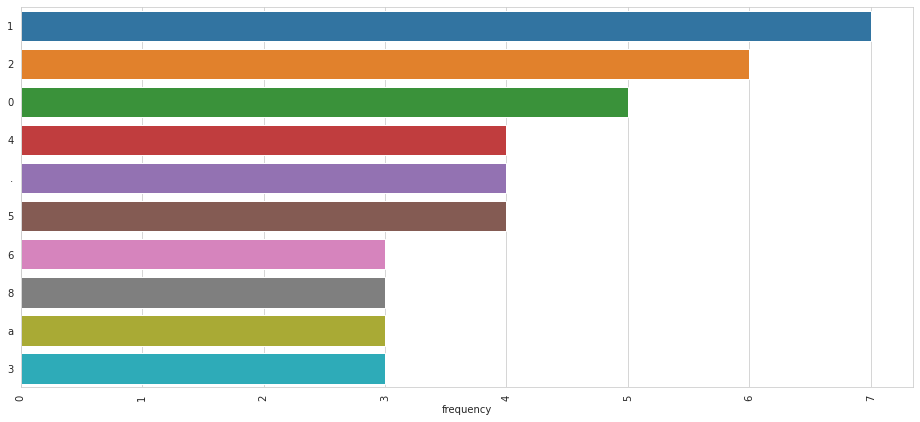

In [19]:
objplt.figure(figsize=(16,7))
sns.barplot(y=item_freq_df.index[:10], x=item_freq_df.frequency[:10])
objplt.xticks(rotation=90)

In [24]:
apriori(transaction_df, min_support=0.0009, use_colnames=True)

,support,itemsets
0,0.000928,(0)
1,0.001299,(1)
2,0.001113,(2)
3,0.000928,"(1, 2)"


In [25]:
#pd.set_option(‘display.max_rows’, 15)
freq_itemset_support = apriori(transaction_df, min_support=0.0009, use_colnames=True)
freq_itemset_support

,support,itemsets
0,0.000928,(0)
1,0.001299,(1)
2,0.001113,(2)
3,0.000928,"(1, 2)"


In [26]:
overal_association_rules = association_rules(freq_itemset_support, metric="confidence", min_threshold=0.001)
overal_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1),(2),0.001299,0.001113,0.000928,0.714286,641.547619,0.000926,3.496103
1,(2),(1),0.001113,0.001299,0.000928,0.833333,641.547619,0.000926,5.992206
